In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from PredictXANES import xanes_derivatives

Data import of 10,000 calculated average XANES spectra along with averaged coordination numbers, number of Cu atoms within 3 angstroms, and number of Te atoms within 3 angstroms.

In [3]:
df = pd.read_csv('mu_cn10000.csv')

In [4]:
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


## Spectra Only:

Neural network is trained on averaged spectra only. The spectra are split into a training set and testing set with a ratio of 4:1. The predicted features are the coordination number, number of Cu atoms, and number of Te atoms.

In [5]:
X = df.drop(labels=['CN', 'Num Cu', 'Num Te'], axis=1)
list = X.columns.tolist()

X.columns = range(X.shape[1])


noise = np.random.normal(0,0.01,[10000,100])
X_noise = X + noise
X_noise.columns = list

for index, row in X_noise.iterrows():
    savgol_filter(row, 51, 2)
    
y = df[['CN', 'Num Cu', 'Num Te']]
X_train, X_test, y_train, y_test = train_test_split(X_noise, y, test_size=0.20, random_state=519)

One layer is added, and the depth of the that layer is optimized by looking at the loss from a range of 1 to 100, the maximum number of features being trained on.

In [6]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf)

           0
0   0.098769
1   0.098035
2   0.036419
3   0.100415
4   0.103165
5   0.039948
6   0.099622
7   0.040694
8   0.034584
9   0.044033
10  0.039482
11  0.040327
12  0.035031
13  0.034594
14  0.036118
15  0.036688
16  0.036592
17  0.043402
18  0.038539
19  0.032437
20  0.041833
21  0.028946
22  0.031868
23  0.044404
24  0.036533
25  0.036403
26  0.038569
27  0.031841
28  0.035914
29  0.036479
30  0.031942
31  0.026465
32  0.037359
33  0.031058
34  0.041342
35  0.037516
36  0.039877
37  0.041666
38  0.041808
39  0.029256
40  0.043258
41  0.033204
42  0.033663
43  0.037103
44  0.034357
45  0.028182
46  0.037764
47  0.029916
48  0.029332
49  0.033993
50  0.038385
51  0.034799
52  0.031559
53  0.028320
54  0.028667
55  0.038139
56  0.030597
57  0.036597
58  0.045636
59  0.035455
60  0.036965
61  0.039696
62  0.042032
63  0.034408
64  0.029994
65  0.036277
66  0.034234
67  0.026341
68  0.039588
69  0.033751
70  0.029671
71  0.026506
72  0.026424
73  0.024110
74  0.037099
75  0.032881

In [7]:
min_loss = lossdf.idxmin()[0]+1
print(min_loss)
nn = MLPRegressor(hidden_layer_sizes=(min_loss), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


74
0.02411002333115713


In [8]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.0702268822697536, 0.07374092297428655, 0.0016907543192591539]
testing mse = [0.07444848141931638, 0.07374092297428655, 0.0016907543192591539]
training R2 = [0.6274316734228731, 0.778253037534071, 0.9670459362817421]
testing R2 = [0.6347870467840476, 0.7752604917852588, 0.9675471093545065]


(3.93479262672811, 5.065207373271892, 3.820325862777078, 5.120909043377169)

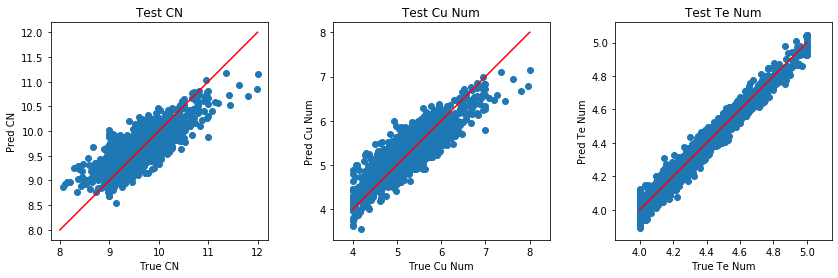

In [9]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


# Repeated for training with both the first and second derivative.

In [10]:
d1, d2 = xanes_derivatives.xanes_derivatives(X_noise)
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = pd.concat([df1, df2], axis=1)

for index, row in df3.iterrows():
    savgol_filter(row, 25, 2)

X_train, X_test, y_train, y_test = train_test_split(df3, y)

In [11]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf10 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf10)

            0
0    0.034221
1    0.029389
2    0.027829
3    0.027768
4    0.027271
5    0.027401
6    0.027558
7    0.027050
8    0.026748
9    0.025987
10   0.025773
11   0.026000
12   0.026234
13   0.026827
14   0.026185
15   0.025661
16   0.026854
17   0.025825
18   0.026181
19   0.025890
20   0.026715
21   0.026299
22   0.025878
23   0.025471
24   0.026217
25   0.025649
26   0.025622
27   0.025195
28   0.025457
29   0.026179
30   0.025292
31   0.026037
32   0.025905
33   0.025318
34   0.025014
35   0.025545
36   0.026011
37   0.025231
38   0.025184
39   0.025738
40   0.025807
41   0.025997
42   0.024699
43   0.025427
44   0.026295
45   0.025579
46   0.025975
47   0.024937
48   0.025476
49   0.025735
50   0.025899
51   0.025409
52   0.025474
53   0.025780
54   0.025652
55   0.025485
56   0.024179
57   0.024555
58   0.024543
59   0.025276
60   0.024666
61   0.024776
62   0.026016
63   0.024850
64   0.025273
65   0.025839
66   0.025548
67   0.025493
68   0.025884
69   0.025675
70   0

In [12]:
min_loss10 = lossdf10.idxmin()[0]+1
print(min_loss10)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

108
0.023684142007711


In [13]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.06675869455498853, 0.06999605288070773, 0.0020907806703094963]
testing mse = [0.07172912907867843, 0.06999605288070773, 0.0020907806703094963]
training R2 = [0.6455143211159591, 0.7898829017217902, 0.9597665444183698]
testing R2 = [0.643306880226503, 0.7854123527549439, 0.9575148452610223]


(3.93479262672811, 5.06520737327189, 3.755072470198919, 5.160442514077406)

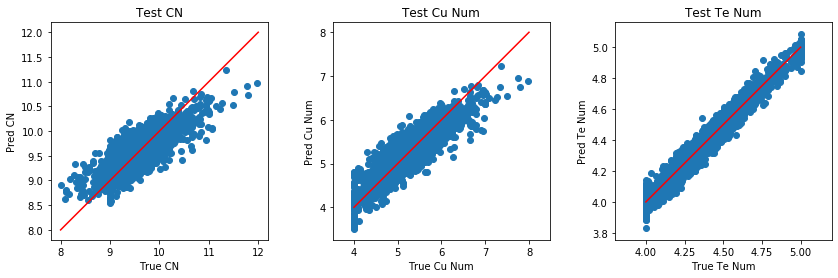

In [14]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [ ]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf11 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf11)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
min_loss11 = lossdf11.idxmin()[0]+1
print(min_loss11)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

In [ ]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

In [ ]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [ ]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf12 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf12)

In [ ]:
min_loss12 = lossdf12.idxmin()[0]+1
print(min_loss12)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

In [ ]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

In [ ]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [ ]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf13 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf13)

In [ ]:
min_loss13 = lossdf13.idxmin()[0]+1
print(min_loss13)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

In [ ]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

In [ ]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')
